# Local Outlier Factor Metrics Using Sample

This program uses the precision, recall, fscore, and false alarm rate evaluation metrics for the LOF algorithm using a sample. The following plots are produced below :

- Precision
- Recall
- Binary F1 Score
- Weighted F1 Score
- False Alarm Rate
- Grouped: Precison, Recall, Binary F1 Score
- Grouped: Precision, Recall, Weighted F1 Score

(The x-axis represents the number of nearest neighbors and the y-axis represents the scores for the three metrics)

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_kddcup99
import numpy as np

# Load in 10% of entire KDDcup99 dataset
kdd99_data = fetch_kddcup99()
X = kdd99_data['data']
y = kdd99_data['target']

In [2]:
# Remove categorical data from X
X_no_cat = np.delete(X,[1,2,3],1)

In [3]:
# Take random sample
sample_indices = np.random.choice(range(len(y)), 59000)
X_sample = X_no_cat[sample_indices,:]
y_sample=y[sample_indices]

print(X_sample.shape)
print(y_sample.shape)

(59000, 38)
(59000,)


In [4]:
y_sample[y_sample == b'normal.'] = 1
y_sample[y_sample != 1] = -1
y_sample = np.int64(y_sample)
print(set(y_sample))

{1, -1}


In [5]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


recall_scores = []
precision_scores = []
f1_scores = []
weighted_f1_scores = []
false_alarms = []

def calculations(n):
   
    lof = LocalOutlierFactor(n_neighbors = n)
    y_pred = lof.fit_predict(X_sample)
    y_pred = np.array(y_pred)
    
    p = precision_score(y_sample, y_pred, pos_label = -1)
    r = recall_score(y_sample, y_pred, pos_label = -1)
    f = f1_score(y_sample, y_pred, pos_label = -1)
    wf = f1_score(y_sample, y_pred, average = 'weighted')
    
    tn, fp, fn, tp = confusion_matrix(y_sample,y_pred).ravel()
    false_alarm = fp/(fp+tn) 
   
    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)
    weighted_f1_scores.append(wf)
    false_alarms.append(false_alarm)

In [6]:
ilist = []
i = 1
while i<5:
    calculations(i)
    ilist.append(i)
    i=i+1
    
i = 5
while i <= 400:
    calculations(i)
    ilist.append(i)
    i = i*2


In [7]:
print('Number of Nearest Neighbors: ', ilist)

Number of Nearest Neighbors:  [1, 2, 3, 4, 5, 10, 20, 40, 80, 160, 320]


In [8]:
print(X_sample.shape)

(59000, 38)


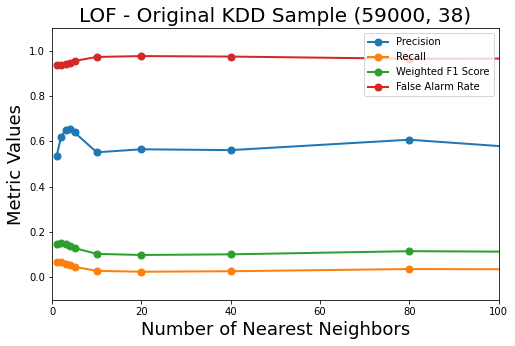

In [9]:
plt.figure(figsize = (8,5))

plt.plot(ilist, precision_scores, marker='o', linewidth=2, markersize=7, label = 'Precision')
plt.plot(ilist, recall_scores, marker='o', linewidth=2, markersize=7, label = 'Recall')
plt.plot(ilist, weighted_f1_scores, marker='o', linewidth=2, markersize=7, label = 'Weighted F1 Score')
plt.plot(ilist, false_alarms,marker='o', linewidth=2, markersize=7, label = 'False Alarm Rate')
    
plt.xlabel('Number of Nearest Neighbors', fontsize = 18)
plt.ylabel('Metric Values', fontsize = 18)
plt.title('LOF - Original KDD Sample (59000, 38)', fontsize = 20)  
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.xlim((0, 100))

plt.show()

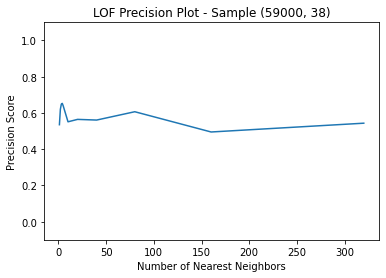

In [10]:
# Precision
plt.plot(ilist, precision_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Precision Score')
plt.title('LOF Precision Plot - Sample (59000, 38)')

plt.ylim((-.1, 1.1))

plt.show()

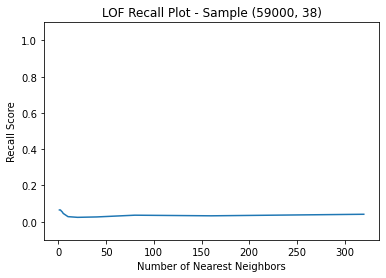

In [11]:
# Recall
plt.plot(ilist, recall_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Recall Score')
plt.title('LOF Recall Plot - Sample (59000, 38)')

plt.ylim((-.1, 1.1))

plt.show()

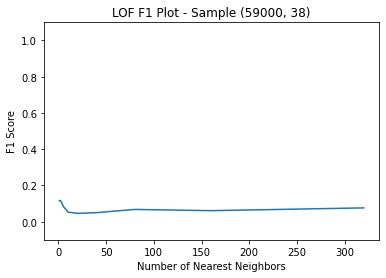

In [12]:
# Binary F1 Score
plt.plot(ilist, f1_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('F1 Score')
plt.title('LOF F1 Plot - Sample (59000, 38)')

plt.ylim((-.1, 1.1))

plt.show()

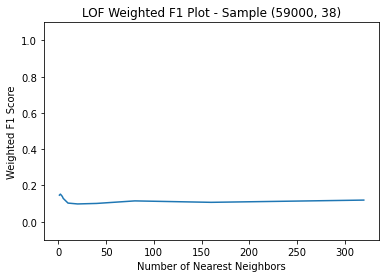

In [13]:
# Weighted F1 Score
plt.plot(ilist, weighted_f1_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Weighted F1 Score')
plt.title('LOF Weighted F1 Plot - Sample (59000, 38)')

plt.ylim((-.1, 1.1))

plt.show()

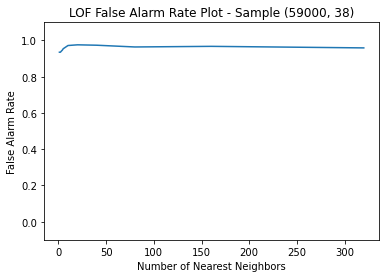

In [14]:
# False Alarm
plt.plot(ilist, false_alarms)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('False Alarm Rate')
plt.title('LOF False Alarm Rate Plot - Sample (59000, 38)')

plt.ylim((-.1, 1.1))

plt.show()

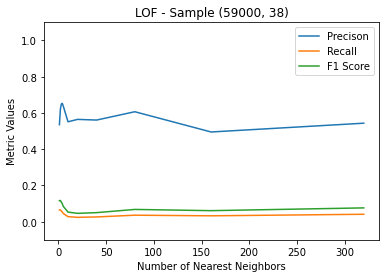

In [15]:
# Grouped - Precision, Recall, Binary F1
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores, label = 'F1 Score')
    
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Metric Values')
plt.title('LOF - Sample (59000, 38)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

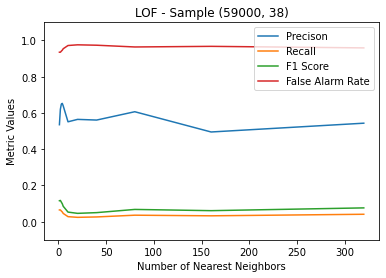

In [16]:
# Grouped - Precision, Recall, Binary F1, False Alarm
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores, label = 'F1 Score')
plt.plot(ilist, false_alarms, label = 'False Alarm Rate')
    
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Metric Values')
plt.title('LOF - Sample (59000, 38)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

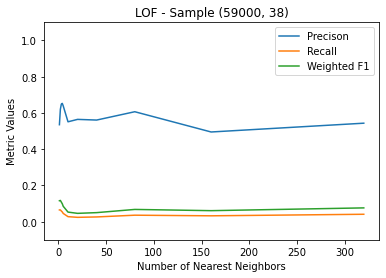

In [17]:
# Grouped - Precision, Recall, Weighted F1
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores,label='Weighted F1')
    
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Metric Values')
plt.title('LOF - Sample (59000, 38)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

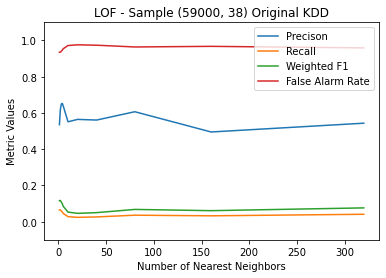

In [18]:
# Grouped - Precision, Recall, Weighted F1, False Alarm Rate
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores,label='Weighted F1')
plt.plot(ilist, false_alarms, label = 'False Alarm Rate')
    
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Metric Values')
plt.title('LOF - Sample (59000, 38) Original KDD')
    
leg = plt.legend();


plt.ylim((-.1, 1.1))

plt.show()

In [19]:
# For single calculations

def single_calculation(n):
   
    lof = LocalOutlierFactor(n_neighbors = n)
    y_pred = lof.fit_predict(X_sample)
    y_pred = np.array(y_pred)
    
    p = precision_score(y_sample, y_pred, pos_label = -1)
    r = recall_score(y_sample, y_pred, pos_label = -1)
    f = f1_score(y_sample, y_pred, pos_label = -1)
    wf = f1_score(y_sample, y_pred, average = 'weighted')
    
    tn, fp, fn, tp = confusion_matrix(y_sample,y_pred).ravel()
    false_alarm = fp/(fp+tn) 
    print('Value of Nearest Neighbor Parameter:', n)
    print('Precision:',p)
    print('Recall:',r)
    print('Weighted F1:',wf)
    print('False Alarm Rate:', false_alarm)

In [20]:
print(max(precision_scores))
print(min(false_alarms))
print(ilist)

0.6528776978417267
0.9352255726236383
[1, 2, 3, 4, 5, 10, 20, 40, 80, 160, 320]


In [21]:
single_calculation(160)

Value of Nearest Neighbor Parameter: 160
Precision: 0.49500805152979066
Recall: 0.03238721368818088
Weighted F1: 0.1067789947379494
False Alarm Rate: 0.9676127863118191


In [22]:
single_calculation(3)

Value of Nearest Neighbor Parameter: 3
Precision: 0.6484792198746228
Recall: 0.058853277704026805
Weighted F1: 0.1460464900111511
False Alarm Rate: 0.9411467222959732


In [23]:
single_calculation(2)

Value of Nearest Neighbor Parameter: 2
Precision: 0.6203834510595359
Recall: 0.06477442737636176
Weighted F1: 0.15199409961589716
False Alarm Rate: 0.9352255726236383


In [25]:
single_calculation(4)

Value of Nearest Neighbor Parameter: 4
Precision: 0.6528776978417267
Recall: 0.05354320753524243
Weighted F1: 0.13944113286750712
False Alarm Rate: 0.9464567924647576


In [24]:
print(precision_scores)
print(false_alarms)

[0.5352039037992332, 0.6203834510595359, 0.6484792198746228, 0.6528776978417267, 0.6386504883101509, 0.5512337933918863, 0.5645481628599801, 0.5608322026232474, 0.6067857142857143, 0.49500805152979066, 0.5435208508256367]
[0.9352887877446951, 0.9352255726236383, 0.9411467222959732, 0.9464567924647576, 0.954527256253029, 0.9722274901489769, 0.9760414691194134, 0.9738710832964579, 0.9641991697747434, 0.9676127863118191, 0.9590787449691299]
